In [225]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from scipy.optimize import curve_fit
import os

#Abundance richiede 9 colonne, in ordine
#1) Wavelenght (angstrom)
#2) elemento.ionizzazione "species code"
#3) energia potenziale lower state (cm^-1)
#4) energia upper states (cm^-1)
#5) log(gf)
#6) fudge factor (per broadening Van der Waals)
#7) tipo di transizione (99 per defaul se non c'è specificato nella linelist o se la transizione è più complessa o transizione molecolare)
#8) Equivalent Width in mA
#9) Fonte del dato (e.g. NIST = National Institute of Standards and Technology)
#
#ARES vuole
#colonna con lunghezze d'onda
#ARES fornisce
#1) wavelenght (angstrom)
#2) numero di linee fittate per il risultato
#3) profondità della riga
#4) FWHM della riga
#5) Equivalent Width della riga
#6) Errore sulla EW
# le ultime 3 sono i coefficienti delle gaussiane per fittare
#7) profondità
#8) sigma
#9) centro
#

#SE le wavelenght sono letteralmente le stesse nei due file (linelist di luke.lst di spectrum e linelist.dat\test.ares di ARES) 
#è sufficiente prendere i dati da luke, individuare le stesse righe e inserire la colonna delle EW da ARES. Altrimenti mi
#metto a piangere

In [226]:
############################## PREPARA FILE PER ABUNDANCE ################################







# Apre il file in modalità lettura
path_to_linemake = f"/home/starcat/LINEE"
path_to_ARES = f"/home/starcat/Modelli/ARES-master"
path_to_abundance = f"/home/starcat/Scrivania/ANALISIATM/spectrum277c/"
path_to_atmosphere = f"/home/starcat/Scrivania/ANALISIATM/ATMOSFERE/"
path_to_output = f"/home/starcat/Scrivania/ANALISIATM/ABBONDANZE_OUT/"
i=0



os.chdir(path_to_linemake)
with open('Iron_lines', 'r') as file:
    LINEM = repr(file.read())
os.chdir(path_to_ARES)

! ./ARES

with open('stella.ares', 'r') as file:
    ARES = repr(file.read())

print(LINEM)
vect1 = LINEM.split("\\n")
vect2 = ARES.split("\\n")
VECT1 = np.zeros((len(vect1),9))

VECT2 = np.zeros((len(vect2),9))
#print("UGABUGA2")
for i in range(1,len(vect2)-1):
    temp2 = vect2[i].split()
    VECT2[i-1][0]= temp2[0]
    VECT2[i-1][1]= temp2[1]
    VECT2[i-1][2]= temp2[2]
    VECT2[i-1][3]= temp2[3]
    VECT2[i-1][4]= temp2[4]
    VECT2[i-1][5]= temp2[5]
    VECT2[i-1][6]= temp2[6]
    VECT2[i-1][7]= temp2[7]
    VECT2[i-1][8]= temp2[8]
t4 = Table.read('stella.ares', format='ascii')
#print(t4)

# for i in range(1, len(vect1)-1): # per ARES linemake
#     temp1 = vect1[i].split()
#     VECT1[i-1][0]= float(temp1[0])
#     VECT1[i-1][1]= temp1[1]
#     VECT1[i-1][2]= float(temp1[2]) * 8066.01
#     VECT1[i-1][3]= 0
#     VECT1[i-1][4]= temp1[3]
#     VECT1[i-1][5]= 1.0
#     VECT1[i-1][6]= 99
#     VECT1[i-1][7]= 0

for i in range(1, len(vect1)-1):
    temp1 = vect1[i].split()
    VECT1[i-1][0]= float(temp1[0])
    VECT1[i-1][1]= temp1[1]
    VECT1[i-1][2]= float(temp1[2])
    VECT1[i-1][3]= temp1[3]
    VECT1[i-1][4]= temp1[4]
    VECT1[i-1][5]= 1.0
    VECT1[i-1][6]= 99
    VECT1[i-1][7]= 0


for i in range(len(VECT1)):
    for j in range(len(VECT2)):
        if (VECT1[i][0] == VECT2[j][0]) and VECT2[j][4]>30:
            VECT1[i][7] = VECT2[j][4]
print(VECT1)





mine.opt
number of options: 12
Input Parameters:

specfits: Stellona1.fits
readlinedat: Iron_lines
fileout: stella.ares
lambdai: 4600.0
lambdaf: 6700.0
smoothder: 4.0
space: 3.00 
rejt: 3;5764,5766,6047,6052,6068,6076

lineresol: 0.100
miniline: 2.0
plots_flag: 0
rvmask: 3,6021.8,6024.06,6027.06,6024.06,20
File: Stellona1.fits
FILE: Stellona1.fits
Extension: .fits - 0
READING FITS FILE: Stellona1.fits 
Ficheiro Aberto...Lendo ficheiro...
Cleaning zero gaps
Velocidade radial: -0.800000
ponto 1000, lambda: 3719.322730 
ponto 1000, lambda: 3719.332648 
Tree: 3;5764,5766,6047,6052,6068,6076

Computing rejt for spectrum...Nranges: 3

Refining search for central wavelenght: Inicial wavelenght: 5764.005679, index: 79327

Refining search for central wavelenght: Inicial wavelenght: 5766.015712, index: 79404
Range 0: [5764.000000 - 5766.000000] : SN: 176.539947

Refining search for central wavelenght: Inicial wavelenght: 6047.002606, index: 90168

Refining search for central wavelenght: Inicial 

In [231]:
############################## PREPARA FILE PER ABUNDANCE ################################

os.chdir(path_to_abundance)
bug = []
o=0
T_atmosold=0
for i in range(len(VECT1)):
    if VECT1[i][1] == 26.0 and VECT1[i][7]>30:
        bug.append(VECT1[i][7])
        o=o+1


linesout = 'stellantess'
iron_linesout = 'stellaFes'
with open(linesout, 'w') as file:
    for i in range(len(VECT1)):
        if VECT1[i][7]!=0:
            file.write(str(VECT1[i][0]))
            file.write('  ')
            file.write(str(VECT1[i][1]))
            file.write('  ')
            file.write(str(VECT1[i][2]))
            file.write('  ')
            file.write(str(VECT1[i][3]))
            file.write('  ')
            file.write(str(VECT1[i][4]))
            file.write('  ')
            file.write(str(VECT1[i][5]))
            file.write('  ')
            file.write(str(VECT1[i][6]))
            file.write('  ')
            file.write(str(VECT1[i][7]))
            file.write('  ')
            file.write('a')
            file.write('\n')


with open(iron_linesout, 'w') as file:
    for i in range(len(VECT1)):
        if VECT1[i][7]!=0 and (VECT1[i][1]==26 or VECT1[i][1]==26.1):
            file.write(str(VECT1[i][0]))
            file.write('  ')
            file.write(str(VECT1[i][1]))
            file.write('  ')
            file.write(str(VECT1[i][2]))
            file.write('  ')
            file.write(str(VECT1[i][3]))
            file.write('  ')
            file.write(str(VECT1[i][4]))
            file.write('  ')
            file.write(str(VECT1[i][5]))
            file.write('  ')
            file.write(str(VECT1[i][6]))
            file.write('  ')
            file.write(str(VECT1[i][7]))
            file.write('  ')
            file.write('a')
            file.write('\n')
o=0

vturb = 1.8
with open('param.txt', 'w') as paramfile:
    paramfile.write(f'ATMname ModelE\nLINESname stellaFes\nOUTname PINOLOS\nvturb {str(vturb)}')

comando_bash = f"cp {iron_linesout} {path_to_output}\{iron_linesout}"
os.system(comando_bash)




os.chdir(path_to_abundance)

FINE, la temperatura migliore è o 4250 o 4250
4250


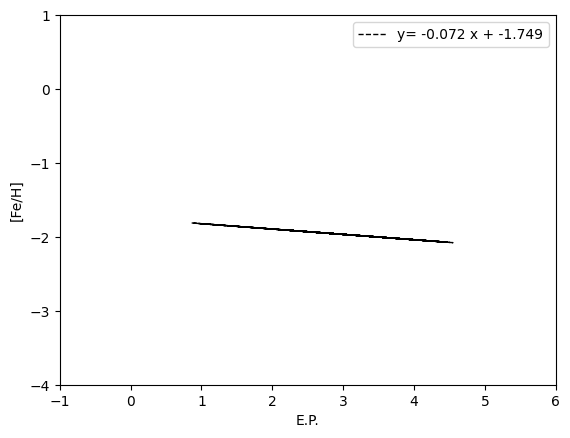

In [230]:
############## LEGGI LA TEMPERATURA E SELEZIONA DI CONSEGUENZA L'ATMOSFERA ##############
trials = 30
T_slope = np.zeros((trials, 2))
for i in range(trials):
    temperatura = [3500, 3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750, 6000, 6250, 6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000, 9250, 9500, 9750, 10000, 10250, 10500, 10750, 11000, 11250, 11500, 11750, 12000, 12250, 12500, 12750, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000]
    logg = [0, 0.50000, 1.00000, 1.50000, 2.00000, 2.50000, 3.00000, 3.50000, 4.00000, 4.50000, 5.00000]
    MH = ["05", "02", "00", "-05", "-10", "-15", "-20"]
    os.chdir(path_to_atmosphere)
    with open('ATMslope0.txt') as atm:
        t_atmos = repr(atm.read())

    tmp = t_atmos.split("\\n")
    tmp = tmp[0].split("'")
    T_atmos = int(tmp[1])
    temp = [abs(T_atmos-x) for x in temperatura]
    guessTemperature = temperatura[temp.index(min(temp))]

    with open('ATMslope.txt') as atm:
        t_atmosold = repr(atm.read())

    if guessTemperature == T_atmosold:
        print(f"FINE, la temperatura migliore è o {guessTemperature} o {T_atmosold}")
        break

    tmpold = t_atmosold.split("\\n")
    tmpold = tmpold[0].split("'")
    T_atmosold = int(tmpold[1])


    comando_bash1 = f"cp /home/starcat/Scrivania/ANALISIATM/ATMOSFERE/MH-20/atmoT{guessTemperature}1.5.txt {path_to_abundance}/ModelE"

    os.system(comando_bash1)


    ### RUN ABUNDANCE ###

    os.chdir(path_to_abundance)

    comando_bash2 = f"mv PINOLOS {path_to_output}/PINOLOS{i}"

    os.system(comando_bash2)
    ! ./abundance -t

    ### PLOT E ANALISI ###

    def func(x, a, b):
        return b +a*x


    # plt.figure()

    os.chdir(path_to_abundance)

    t1 = Table.read('stellaFes', format='ascii')
    t2 = Table.read('PINOLOS',format='ascii')

    eqw=t1['col8']
    print(t2)
    tag=t1['col9']
    col_eqw = Table.Column(name='eqw', data=eqw)
    col_tag = Table.Column(name='tag', data=tag)
    t2.add_column(col_eqw)
    t2.add_column(col_tag)

    #t2 = Table.read('ressousa.am15at4250g10k2odfnew.dat',format='ascii')

    #z=t2['D']


    x=t2['col3']
    y=t2['col7']
    z=t2['eqw']
    fe=t2['col2']
    # x=t2['C']
    # y=t2['G']
    # z=t2['eqw']
    # fe=t2['B']




    limit=((fe==26.0))
    x=x[limit]
    y=y[limit]
    #z=z[limit]


    limit=((y<np.mean(y)+2*np.std(y))&(y>np.mean(y)-2*np.std(y)))
    x=x[limit]
    y=y[limit]
    #z=z[limit]



    print(np.mean(y),np.std(y))

    # plt.plot(x,y,"o")

    color=(1/np.max(z),0,0)
    popt, pcov = curve_fit(func, x, y,method='lm')
    std1=np.std(y-(func(x,*popt)))
    print(f"deviazione standard = {std1} www")
    os.chdir('/home/starcat/Scrivania/ANALISIATM/ATMOSFERE/')
    T_slope[i][0] = int(guessTemperature)
    T_slope[i][1] = popt[0]

    if(popt[0]>0): #alza la temperatura
        tmp_guessTemp = temperatura[temperatura.index(guessTemperature)+1]
    else:
        tmp_guessTemp = temperatura[temperatura.index(guessTemperature)-1]

    with open('ATMslope0.txt', 'w') as atmfile:
        atmfile.write(str(tmp_guessTemp))

    with open('ATMslope.txt', 'w') as atmfile:
        atmfile.write(str(guessTemperature))
    #i = i+1

# x=x[limit]
# y=y[limit]
plt.plot(x, func(x, *popt),'k--', lw=1., label='y= %5.3f x + %5.3f'% tuple(popt))
print(guessTemperature)
plt.axis([-1,6,-4,1])
plt.xlabel('E.P.')
plt.ylabel('[Fe/H]')
#plt.colorbar(label='E.W.')
plt.legend()
plt.show()

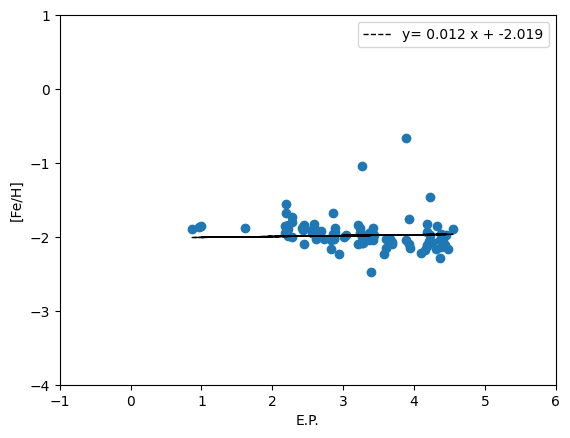

0.33258309828433724
-1.9813763440860215


In [240]:

os.chdir(path_to_output)

t1 = Table.read('stellaFes', format='ascii')
t2 = Table.read('PINOLOS5',format='ascii')

eqw=t1['col8']
tag=t1['col9']
col_eqw = Table.Column(name='eqw', data=eqw)
col_tag = Table.Column(name='tag', data=tag)
t2.add_column(col_eqw)
t2.add_column(col_tag)

#t2 = Table.read('ressousa.am15at4250g10k2odfnew.dat',format='ascii')

#z=t2['D']


x=t2['col3']
y=t2['col7']
z=t2['eqw']
fe=t2['col2']
# x=t2['C']
# y=t2['G']
# z=t2['eqw']
# fe=t2['B']




limit=((fe==26.0))
x=x[limit]
y=y[limit]
plt.plot(x,y,"o")
color=(1/np.max(z),0,0)
popt, pcov = curve_fit(func, x, y,method='lm')
std1=np.std(y-(func(x,*popt)))
mean1=np.mean(y)
limit=((y<np.mean(y)+1*np.std(y))&(y>np.mean(y)-1*np.std(y)))
x=x[limit]
y=y[limit]
plt.plot(x, func(x, *popt),'k--', lw=1., label='y= %5.3f x + %5.3f'% tuple(popt))
plt.axis([-1,6,-4,1])
plt.xlabel('E.P.')
plt.ylabel('[Fe/H]')
#plt.colorbar(label='E.W.')
plt.legend()
plt.show()
print(std1)
print(mean1)

[[ 5.50000000e+03 -3.29498453e-01]
 [ 5.25000000e+03 -2.79754482e-01]
 [ 5.00000000e+03 -2.23870247e-01]
 [ 4.75000000e+03 -1.56027369e-01]
 [ 4.50000000e+03 -7.23078163e-02]
 [ 4.25000000e+03  1.05644261e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0

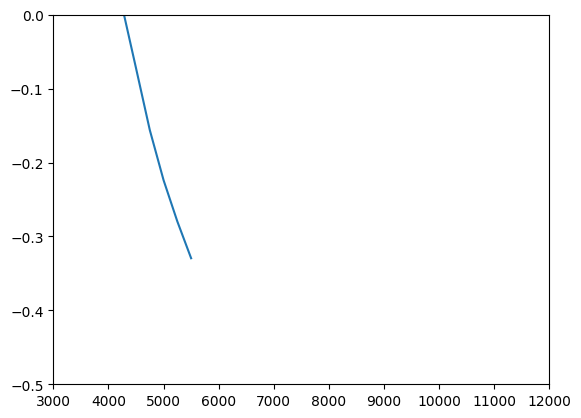

/tmp/ipykernel_4466/1777088624.py:17: RuntimeWarning: invalid value encountered in scalar divide
  derivata[i]=((T_slope[i][1] - T_slope[i-1][1])/(T_slope[i][0] - T_slope[i-1][0]))


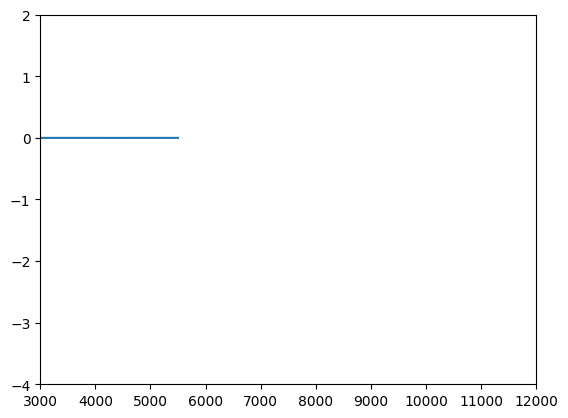

In [ ]:
print(T_slope)
x = []
y = []
for i in range(trials):
    x.append(T_slope[i][0])
    y.append(T_slope[i][1])
plt.plot(x, y)
plt.axis([3000,12000,-0.5,0])
plt.show()
print()

#derivatina

derivata = np.zeros((trials, 2))

for i in range(1,trials):
    derivata[i]=((T_slope[i][1] - T_slope[i-1][1])/(T_slope[i][0] - T_slope[i-1][0]))

dx = []
dy = []
for i in range(trials):
    dx.append(T_slope[i][0])
    dy.append(derivata[i][1])
plt.plot(dx, dy)
plt.axis([3000,12000,-4,2])
plt.show()

In [ ]:
t2

<Table length=93>
  col1     col2    col3    col4    col5    col6    col7     eqw    tag 
float64  float64 float64 float64 float64 float64 float64  float64  str1
-------- ------- ------- ------- ------- ------- ------- --------- ----
4736.773    26.0   3.211     0.0  -6.703   5.333  -2.163 100.65132    a
4741.529    26.0   2.832     0.0  -7.032   5.004  -2.492  51.18029    a
4786.807    26.0   3.017     0.0  -6.858   5.178  -2.318  56.50494    a
4872.138    26.0   2.882     0.0  -6.792   5.244  -2.252 132.49405    a
4882.143    26.0   3.417     0.0  -6.701   5.335  -2.161  42.89806    a
4889.001    26.0   2.198     0.0  -6.504   5.532  -1.964  92.09311    a
4889.102    26.0   3.884     0.0   -5.48   6.556   -0.94  92.43001    a
 4903.31    26.0   2.882     0.0  -6.834   5.202  -2.294 108.65711    a
 4924.77    26.0   2.279     0.0  -6.741   5.295  -2.201  87.06919    a
4938.814    26.0   2.876     0.0  -6.928   5.108  -2.388  94.61731    a
     ...     ...     ...     ...     ...     ...     ...       ...  ...
6411.648    26.0   3.654     0.0  -6.915   5.121  -2.375  75.62315    a
 6481.87    26.0   2.279     0.0  -6.661   5.375  -2.121  59.13277    a
6498.938    26.0   0.958     0.0  -6.899   5.137  -2.359  51.58026    a
6518.366    26.0   2.832     0.0  -6.915   5.121  -2.375    30.437    a
6574.227    26.0    0.99     0.0  -6.882   5.154  -2.342  30.42619    a
6592.912    26.0   2.728     0.0   -6.96   5.076   -2.42  99.60291    a
6593.869    26.0   2.433     0.0  -6.832   5.204  -2.292  72.10475    a
 6609.11    26.0   2.559     0.0  -6.852   5.184  -2.312  41.10113    a
6663.441    26.0   2.424     0.0  -6.804   5.232  -2.264  71.70473    a
6677.985    26.0   2.692     0.0  -6.857   5.179  -2.317 114.52956    a

In [ ]:
print((temperatura[39]))

14000
